## Characteristics of New Housing

This page provides national, annual data on the characteristics of new privately-owned residential structures, such as square footage, number of bedrooms and bathrooms, type of wall material, and sales prices. Many characteristics are available at the region level.  https://www.census.gov/construction/chars/

This notebook contains basic statistical analysis and visualization of the data.

### Data Sources
- summary : Processed file from notebook 1-Data_Prep

### Changes
- 12-29-2018 : Started project

In [13]:
import pandas as pd
from pathlib import Path
from datetime import datetime
#import seaborn as sns
import feather
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

### File Locations

In [14]:
today = datetime.today()
in_file = Path.cwd() / "data" / "processed" / f"summary_{today:%b-%d-%Y}.feather"
report_dir = Path.cwd() / "reports"
report_file = report_dir / "Excel_Analysis_{today:%b-%d-%Y}.xlsx"

In [15]:
df = feather.read_dataframe(in_file)
df.head()

,CentralAir,RestrictedAge,HomeOwnerAssociation,FoundationType,BuildReason,ClosingCostsInc,CondominiumProject,Deck,HouseDesign,CensusDivision,...,PriceContract,PriceSales,FootagePrelimSQFT,SurveyWieght,HeatingSystemFuelPrimary,HeatingSystemFuelSecondary,PriceContractAtCompletion,PriceSalesAtCompletion,PermitAuthorizationDate,FILENAME
0,Yes,No,No,Basement,SaleOrRent,0,NaN,Yes,No,New England,...,NaN,NaN,NaN,51.0,Electricity,NaN,NaN,NaN,2010-01-01,soc10
1,Yes,No,Yes,Slab,SaleOrRent,0,NaN,Yes,No,New England,...,NaN,NaN,1879.0,31.0,Nat Gas,NaN,NaN,NaN,2009-10-01,soc10
2,Yes,No,No,Basement,SaleOrRent,0,No,No,Yes,New England,...,NaN,NaN,5076.0,31.0,Nat Gas,NaN,NaN,NaN,2009-07-01,soc10
3,Yes,No,No,Basement,SaleOrRent,0,NaN,Yes,Yes,New England,...,NaN,NaN,3717.0,24.0,Electricity,OtherOrNone,NaN,NaN,2010-12-01,soc10
4,Yes,No,Yes,Basement,SaleOrRent,0,Yes,Yes,No,New England,...,NaN,289900.0,1335.0,31.0,Nat Gas,NaN,NaN,NaN,2009-09-01,soc10


In [16]:
df.set_index('PermitAuthorizationDate', inplace=True)

### Perform Data Analysis

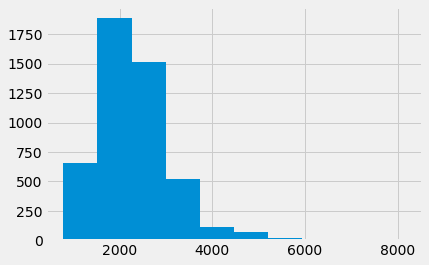

In [6]:
df.loc[df['RestrictedAge'] =='Yes','FootagePrelimSQFT'].hist()

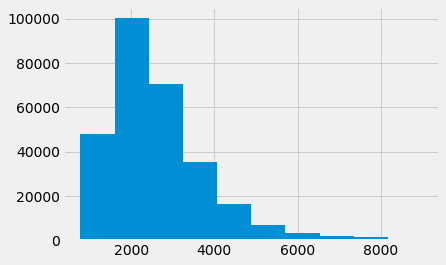

In [9]:
df['FootagePrelimSQFT'].hist()

In [58]:
#Properly Wieght A Given Measurment 
#df['FootagePrelimSQFT'].groupby(by=[df.index.year]).mean()
df['FootagePrelimSQFT_Wieght'] = df['FootagePrelimSQFT'] * df['SurveyWieght']

df_finalSQFT = df[['FootagePrelimSQFT_Wieght','SurveyWieght']].groupby(by=[df.index.year]).sum()
df_finalSQFT['FootagePrelimSQFT_Wieght'] =df_finalSQFT['FootagePrelimSQFT_Wieght'] / df_finalSQFT['SurveyWieght']
df_finalSQFT.head(10)

,FootagePrelimSQFT_Wieght,SurveyWieght
PermitAuthorizationDate,,
2000,3156.000000,46.0
2001,2654.378669,7257.0
2002,2433.712009,30553.0
2003,2428.255390,119664.0
2004,2401.162877,1099377.0
2005,2389.122220,3075889.0
2006,2416.364581,2609352.0
2007,2406.227990,1903873.0
2008,2365.375704,1046768.0


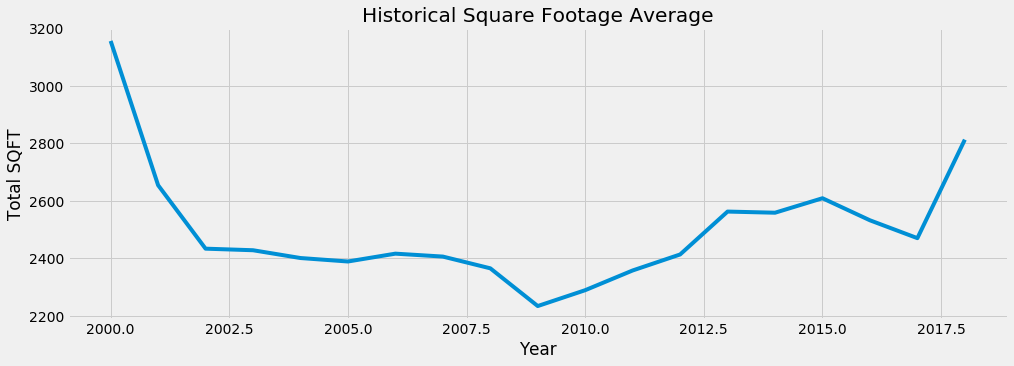

In [59]:
df_finalSQFT.loc[df_finalSQFT['FootagePrelimSQFT_Wieght']>0 , 'FootagePrelimSQFT_Wieght'].plot(figsize=[15,5])
plt.title('Historical Square Footage Average')
plt.xlabel('Year')
plt.ylabel('Total SQFT')
plt.style.use('fivethirtyeight')
plt.savefig('./images/averageTotalSqft.png')
plt.show()